# DataStory - Lyrics Analyzer

Ina Widmer, Michael Job 

## Abstract

Analyse the words used in swiss chartsongs (1998 - 2018). Which words are used the most, in what year. Are words like 'facebook' and so on since the rise of social media present in chartsongs?  
Some of the social media words appear in the analysed lyrics, but only a few times. Words like love, know, yeah, baby stay most common.

## Introduction

### Questions

* Do words from social media appear in chart songs? 
* Do these appearings correlate with the rise of social media?
* What other words are most common?

### Data Source

Chartsongs of the last 20 years are gathered from swiss charts website https://hitparade.ch/charts/singles . 

Data Limitation:  
* Time range: from 4.10.1998 to 7.10.2018  
* Time slot: every three months (every 84 days)  
* Songs: Top 25 songs per date

The lyrics were collected over the API https://lyrics.ovh/.   

### Data Fetching

There is no API provided for the swiss charts data, so we used webcrawling. The crawler called for each required chartsdate the hitparade.ch website for the specific date  
Example: https://hitparade.ch/charts/singles/16-09-2018  


Run Pyhton Script ```DataFetching.py``` to fetch data and save to JSON file.

Record sample JSON file
```
[{   
    "artist": "Calvin Harris & Sam Smith",  // Song interpret
    "title": "Promises",                    // Song title
    "date": "07-10-2018",                   // Charts Date
    "ranking": "3",                         // Charts Ranking
    "lyrics": "Are you drunk enough? ..."   // Lyrics
 }, 
    ...
 ]
```  

### Analyzed Social Media Words:
Source: Self defined

In [1]:
import pandas as pd
socialData = pd.read_json(path_or_buf='data/some.json')
print(socialData)

          some
0     facebook
1      twitter
2         xing
3     linkedin
4      youtube
5    instagram
6     snapchat
7     whatsapp
8        tweet
9     unfriend
10  influencer
11     google+
12     mention
13        post
14     retweet
15      repost
16       share
17     hashtag
18      social
19       media
20        chat
21    emoticon
22      emotji
23   pinterest
24      tumblr
25       weibo
26      flickr


## Results

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

#  Analyse swiss charts data
#  from 7.10.2018 until 4.10.1998

### read json data from file into pandas object
path2data = 'data/charts_lyrics_1998-2018.json'
data = pd.read_json(path_or_buf=path2data, orient=None, typ='frame', dtype=True, convert_axes=True, convert_dates=True,
                 keep_default_dates=True, numpy=False, precise_float=False, date_unit=None, encoding='utf-8',
                 lines=False, chunksize=None, compression='infer')


## Function to get n most common words for data
def get_top_n_words(lyrics, n=None):
    vec = CountVectorizer(stop_words='english').fit(lyrics)
    bag_of_words = vec.transform(lyrics)    # matrix where each row represents a specific text
    sum_words = bag_of_words.sum(axis=0)    # vector that contains the sum of each word occurrence
    words_freq = pd.DataFrame([(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()], columns=['word', 'occurrence'])
    words_freq = words_freq.sort_values(by=['occurrence'], ascending=False)
    return words_freq.head(n)

#### Descrition fetched Data

In [3]:
print("Fetched songs: \t\t\t"+str(data.artist.count()))
print("Songs with lyrics: \t\t"+str((data.lyrics.values != '').sum()))
print("Songs with no lyrics: \t\t"+str((data.lyrics.values == '').sum()))
print("Number of unique songlyrics: \t"+str(data.lyrics.nunique()))


Fetched songs: 			2200
Songs with lyrics: 		1966
Songs with no lyrics: 		234
Number of unique songlyrics: 	1665


#### Descrition words occurrence in lyrics

describe lyrics words occurrence:


,occurrence
count,22138.000000
mean,15.842036
std,113.251787
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,5366.000000


top20_words:


,occurrence
count,20.000000
mean,2986.650000
std,1162.059663
min,1699.000000
25%,1963.750000
50%,2753.500000
75%,3841.250000
max,5366.000000


Text(0.5,1,'Boxplot top 20 common words')

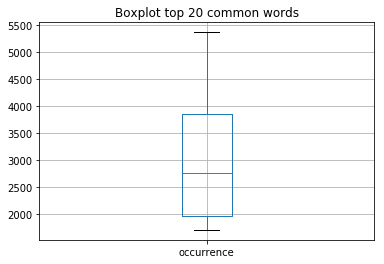

In [4]:
df_all = get_top_n_words(data.lyrics) ## Get all words
print("describe lyrics words occurrence:")
display(df_all.describe())

top20_words = get_top_n_words(data.lyrics, 20)
print("top20_words:")
display(top20_words.describe())
top20_words.boxplot()
plt.title("Boxplot top 20 common words")

#### Most common words for all Data (1998 - 2018)

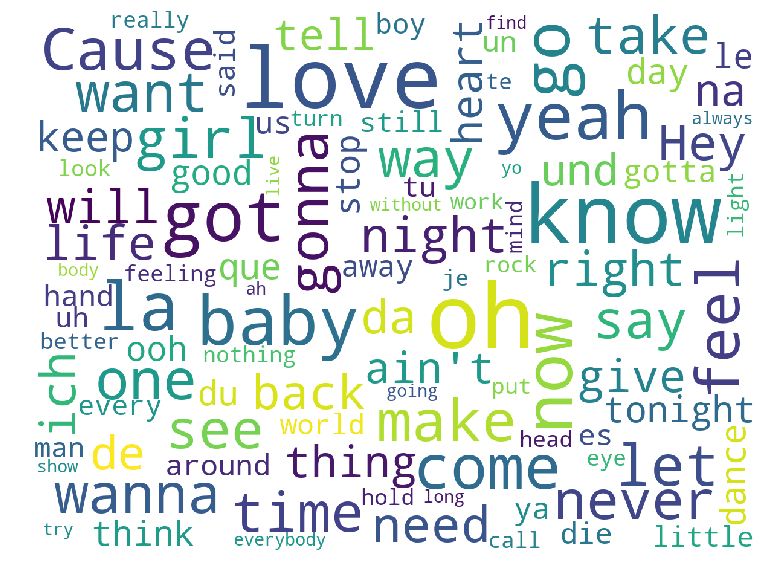

In [25]:
def createWordcloud(text):
    from PIL import Image
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

    # Create stopword list:
    stopwords = set(STOPWORDS)
    #stopwords.update(["der","die","das"])

    # Start with one review:

    text = " ".join(lyrics for lyrics in text)
    print ("There are {} words in the combination of all lyrics.".format(len(text)))

    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(stopwords=stopwords, width=1200, height=900, max_font_size=150, max_words=100, background_color="white", collocations=False).generate(text)
    plt.figure(figsize=(14,10))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    #wordcloud.to_file("data/allwords-cloud.png")

def printWordCloud():
    plt.figure(figsize=(14,10))
    img = plt.imread("data/allwords-cloud.png")
    plt.imshow(img)
    plt.axis('off')
    
#createWordcloud(data.lyrics) #generate Wordcloud with most common words
printWordCloud()

#### Social media words in all Data (1998 - 2018)

In [26]:
## Get count per year for specific words

path2data = 'some.json'
socialData = pd.read_json(path_or_buf=path2data)
socialDataCounts = []

wordFrequenz = get_top_n_words(data.lyrics)
socialDataCounts = wordFrequenz[wordFrequenz.word.isin(socialData.some)]

text = []

def createWordString(w):
    newWord = w.word+" "
    text.append(newWord*w.occurrence)

socialDataCounts.apply(createWordString, axis=1)


socialDataText = ''.join(text)

createWordcloud(socialDataText)

ModuleNotFoundError: No module named 'wordcloud'

## Conclusion